<a href="https://colab.research.google.com/github/jhonyhenrick/Cleveland-Heart-Disease-project-IA/blob/main/PROJETO_1_Classifica%C3%A7%C3%A3o%20Multiclasse%20e%20Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJETO 1 - Inteligência Artificial -  “The Cleveland Heart Disease Dataset”.**

**Alunos**:

*   Gabriel Blanco de Andrade - GU3013359
*   Humberto Miliszewski - GU3012468
*   João Henrique Gonçalves Barbosa - GU3011275
*   João Lucas Rosa - GU3013618




In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir a seed para garantir a reprodutibilidade dos resultados
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
# Carregar o dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names, na_values='?')

# Verificar a dimensão do dataset
print(df.shape)

(303, 14)


In [ ]:
# Excluir linhas com valores NaN
df.dropna(inplace=True)

# Transformar a coluna 'target' em binária
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Separar entradas (X) e saídas (y)
X = df.drop('target', axis=1).values
y = df['target'].values

# Dividir o dataset em 70% treino, 15% validação e 15% teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Model: "rede_IF_02"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None


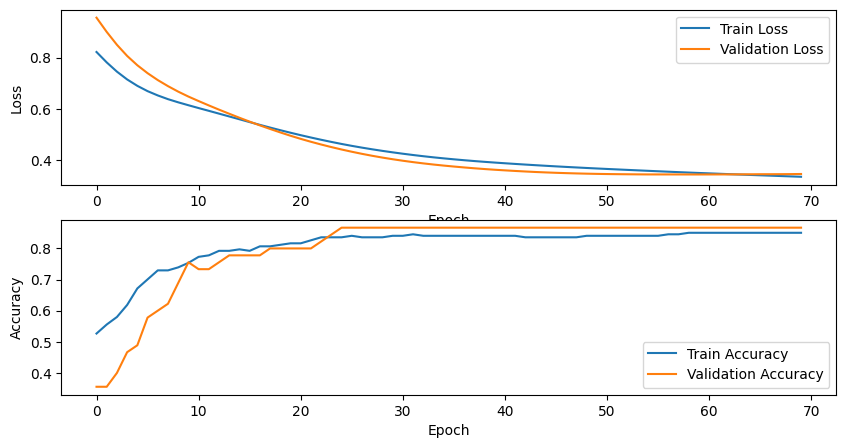

In [ ]:
# Definir a rede neural "keras model"
input_dim = X_train.shape[1]
model = tf.keras.Sequential(name='rede_IF_02')
model.add(tf.keras.layers.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compilar a rede neural
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

# Treinar a rede neural com o dataset
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100, verbose=0, callbacks=[early_stopping])

# Mostrar o loss e a acurácia durante o treinamento
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()



In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8843 - loss: 0.3010
Test Loss: 0.2986
Test Accuracy: 0.8889


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8843 - loss: 0.3010 
Accuracy: 88.89
data pred = [[0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]]


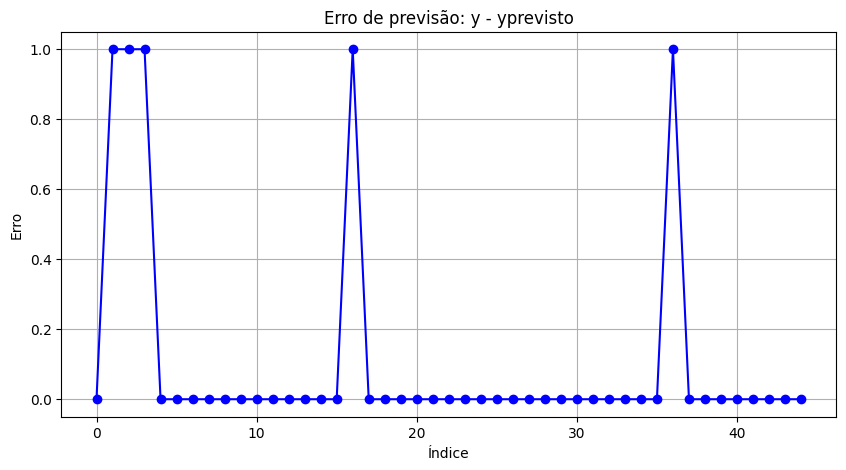

In [ ]:
# Fazer previsões com a rede treinada
y_pred = model.predict(X_test)

# Calcula a acurácia no conjunto de teste
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

# Mostrar os resultados esperados e os alcançados lado a lado
y_pred_rounded = np.around(y_pred).flatten()
print('data pred =', np.column_stack((y_test, y_pred_rounded)))

# Fazer o gráfico do erro de previsão
plt.figure(figsize=(10, 5))
plt.plot(y_test - y_pred_rounded, marker='o', linestyle='-', color='b')
plt.title('Erro de previsão: y - yprevisto')
plt.xlabel('Índice')
plt.ylabel('Erro')
plt.grid()
plt.show()


Índice de Silhueta: 0.120


<ipython-input-44-e39ee30c5a7e>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', 5)  # Usando mapa de cores que suporta até 5 clusters distintos


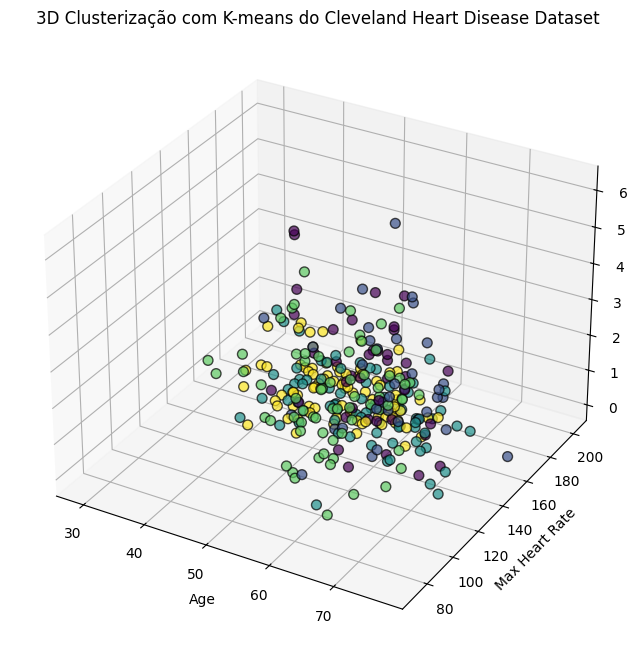

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Carregar o dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names, na_values='?')

# Limpeza de dados: remover linhas com valores NaN para garantir a qualidade da análise
df.dropna(inplace=True)

# Preparar dados para clusterização: remover a coluna 'target', pois ela não é usada na clusterização
X = df.drop('target', axis=1).values

# Normalizar os dados para ter uma escala comum, essencial para o bom desempenho do K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means para clusterizar os dados com 5 clusters, conforme descrição do 'target'
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

# Calcular o índice de silhueta para avaliar a qualidade dos clusters formados
silhouette = silhouette_score(X_scaled, clusters)
print(f'Índice de Silhueta: {silhouette:.3f}')

# Visualização dos clusters em 3D usando três características para visualização
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.get_cmap('viridis', 5)  # Usando mapa de cores que suporta até 5 clusters distintos

ax.scatter(X[:, 0], X[:, 7], X[:, 9], c=colors(clusters), s=50, edgecolor='k', alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Max Heart Rate')
ax.set_zlabel('ST Depression')
ax.set_title('3D Clusterização com K-means do Cleveland Heart Disease Dataset')
plt.show()
